# Final Project
### Divina M Arpino - 12/13/2023

Objective: 
Now that your data is clean, you can begin your analysis of your dataset.
- Perform whatever aggregate functions you need to, in order to answer at least 2 of your questions. State your questions in Markdown cells and show the answer using Python, displaying the result in a plot.

Submit:
The latest version of your Jupyter notebook for your final project.

Dataset(s):
    - Datasets being explored:
        - https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks/data
        - https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019/data



## Read datasets from csv files

#### Initial cleaning steps were needed when initial read of files showed some shifted columns. I went back to excel and fixed the column shifting there before re-importing

 - I used Excel to address error that came up in the initial GoodReads file load ("ParserError: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13"):
<i>The error was caused by data delimiter that shifter some columns to the right for four rows of data</i>
  ![image.png](attachment:image.png)

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [345]:
#read csv files / store in working dataframes
data_goodreads = "input/books.csv"
data_amazon = "input/bestsellers with categories.csv"
df_goodreads = pd.read_csv(data_goodreads)
df_amazon = pd.read_csv(data_amazon)

## Explore the Datasets

### GoodReads dataset
#### Check structure of the dataframe to familiarize with data and layout

In [6]:
df_goodreads.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/06,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/04,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/03,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/04,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/04,Scholastic


In [7]:
df_goodreads.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/04,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12/1/88,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,8/1/93,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/07,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9.788500e+12,spa,272,113,12,5/28/06,Edimat Libros


In [8]:
df_goodreads.shape

(11127, 12)

In [9]:
df_goodreads.sample

<bound method NDFrame.sample of        bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11122   45631   Expelled from Eden: A William T. Vollmann Reader   
11123   45633                        You Bright and Risen Angels   
11124   45634                    The Ice-Shirt (Seven Dreams #1)   
11125   45639                                        Poor People   
11126   45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                             J.K. Rowling/Mary GrandPré            4.57   

In [10]:
df_goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  float64
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [324]:
df_goodreads.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

### Amazon dataset
#### Check structure of dataframe to familiarize with data and layout

In [12]:
df_amazon.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [13]:
df_amazon.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [14]:
df_amazon.shape

(550, 7)

In [15]:
df_amazon.sample

<bound method NDFrame.sample of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson  

In [16]:
df_amazon.info

<bound method DataFrame.info of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson  

In [17]:
df_amazon.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

## Data Cleaning

### GoodReads Dataset

#### There are no null values in this dataset. No cleaning in this area is necessary

In [18]:
df_goodreads.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

### Amazon Dataset

#### There are no null values in this dataset. No cleaning in this area is necessary

In [19]:
df_amazon.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [35]:
# Check column names
df_goodreads.columns # has spaces in num_pages, needs removal of whitespaces in column names
#df_amazon.columns # has a space in User Ratings, needs renaming of column

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

#### Rename User Rating column to remove space

In [356]:
df_amazon.rename(
    columns=({ 'User Rating': 'UserRating'}), 
    inplace=True,
)
df_amazon.columns

Index(['Name', 'Author', 'UserRating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

#### Cleanup spaces in Goodreads columns

In [37]:
df_goodreads.columns.str.lstrip()

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [318]:
#Look at the language codes in the dataset
df_goodreads['language_code'].value_counts()

language_code
eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [346]:
# for simplicity and to avoid duplication of titles, I am dropping all titles that are not in ENG or EN-US
# the counts in the other languages are also smaller and likely not part ot the Amazon dataset either, 
# so it makes most sense to drop them at this point

# Languages
languages = ['eng', 'en-US']

# Drop all other rows 
df_goodreads = df_goodreads[df_goodreads['language_code'].isin(languages)]
df_goodreads['language_code'].value_counts()

language_code
eng      8911
en-US    1409
Name: count, dtype: int64

In [347]:
# at this point i also don't care for the 'bookID', isbn', 'isbn13', 'language_code', or 'publisher', so I am going 
# to drop those columns altogether
# Columns to drop
gr_drop_cols = ['bookID', 'isbn', 'isbn13', 'language_code', 'publisher']

# Drop the specified rows
df_goodreads = df_goodreads.drop(columns=gr_drop_cols)
df_goodreads.head(5)

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,9/16/06
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,9/1/04
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,6333,244,11/1/03
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,5/1/04
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,2690,41428,164,9/13/04


In [348]:
# to match the Amazon date slyles, I am changing the publication date to a year.
# this will not be a bestselling year, so it can't be compared the same way as the Amazon set, but
# it will be useful to have it converted for graphing
# Convert 'PublicationDate' to datetime format
df_goodreads['publication_date'] = pd.to_datetime(df_goodreads['publication_date'], errors='coerce')

# Extract the four-digit year
df_goodreads['Year'] = df_goodreads['publication_date'].dt.year.astype('Int64')

# Drop the original 'PublicationDate' column if needed
df_goodreads.drop(columns=['publication_date'], inplace=True)
df_goodreads.head(5)

/var/folders/jn/b7xrp7ts1n3fmnzk1xldvd4r0000gn/T/ipykernel_8519/1201464275.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_goodreads['publication_date'] = pd.to_datetime(df_goodreads['publication_date'], errors='coerce')


,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,Year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,6333,244,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,2690,41428,164,2004
...,...,...,...,...,...,...,...
11121,Whores for Gloria,William T. Vollmann,3.69,160,932,111,1994
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,512,156,20,2004
11123,You Bright and Risen Angels,William T. Vollmann,4.08,635,783,56,1988
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,415,820,95,1993


In [ ]:
# I am renaming the columns to match more closely the naming in the Amazon set (makes it easier to track)
# and copy the code over

In [511]:
# Rename multiple columns
df_goodreads = df_goodreads.rename(columns={'title': 'Name',
                   'authors': 'Author',
                   'average_rating': 'UserRating',
                   '  num_pages': 'Pages',
                   'ratings_count': 'RatingsCount',
                   'text_reviews_count': 'Reviews'})
df_goodreads.head(5)

,Name,Author,UserRating,Pages,RatingsCount,Reviews,Year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,6333,244,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,2690,41428,164,2004


In [44]:
# Checking to make sure each year lists the Top 50
df_amazon['Year'].value_counts()

Year
2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: count, dtype: int64

#### Cleanup notes
- I checked for null values and didn't find any
- I renamed User Rating above to remove space, and removed spaces in the goodreads num_pages
- As I began analyzing the data I added cleaning actions to the goodreads dataset. I dropped extra data that is not needed, dropped extra columns, and renamed columns to be more closely named to those of the Amazon dataset

## Data Analysis

#### What are the top 5 books in fiction and non-fiction genre based on highest number or rating and user reviews for each year?
For this answer we look at the Amazon dataset because goodreads does not have a genre breakdown. A comparision of the Fiction and NonFiction genres for their average user rating and the sum of the genre reviews. This shows that Fiction books are getting slightly better average ratings,
and are reviewed by more people

- Analyzing Genre (Amazon) - Ratings/Reviews per genre
    - First I compared the Fiction and NonFiction genres for their average user rating and the sum of the genre reviews. This shows that Fiction books are getting slightly better average ratings, and are reviewed by more people
    - <b>#PROFESSOR#</b>(I used ChatGPT to help with aggregating multiple columns in result)  
    
- Analyzing Genre (Amazon) - Top 5 based on UserRatings - grouped by year
    - <b>#PROFESSOR#</b>(used chatGPT that recommended 'apply with lambda')
 
- Analyzing Genre (Amazon) - Top 5 based on Reviews - accross years
    - <b>#PROFESSOR#</b>(used chatGPT that recommended 'apply with lambda')

In [136]:
# Analyzing Genre (Amazon) - Ratings/Reviews per genre
df_amazon.groupby('Genre').agg({'UserRating': 'mean', 'Reviews': 'sum'}).reset_index()

,Genre,UserRating,Reviews
0,Fiction,4.648333,3764110
1,Non Fiction,4.595161,2810195


In [150]:
# Analyzing Genre (Amazon) - Ratings/Reviews per genre - counts
df_amazon.groupby('Genre').Name.count().reset_index()

,Genre,Name
0,Fiction,240
1,Non Fiction,310


<Axes: xlabel='Genre', ylabel='count'>

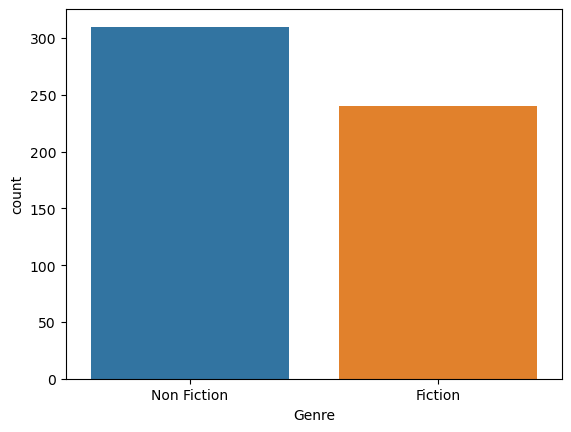

In [151]:
# Analyzing Genre - Here we plot the count of books of each genre from the previous cell
sns.countplot(
    data=df_amazon, x =df_amazon['Genre']
)

In [559]:
# Analyzing Genre (Amazon) - Top 3 based on UserRatings - grouped by year
amz_top5year_ratings = df_amazon.groupby(df_amazon['Year']).apply(lambda x: x.nlargest(3, 'UserRating')).reset_index(drop=True)
amz_top5year_ratings.head(10)

,Name,Author,UserRating,Reviews,Price,Year,Genre
0,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
1,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
2,Have a Little Faith: A True Story,Mitch Albom,4.8,1930,4,2009,Non Fiction
3,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
4,The Help,Kathryn Stockett,4.8,13871,6,2010,Fiction
5,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2010,Fiction
6,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
7,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
8,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction
9,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


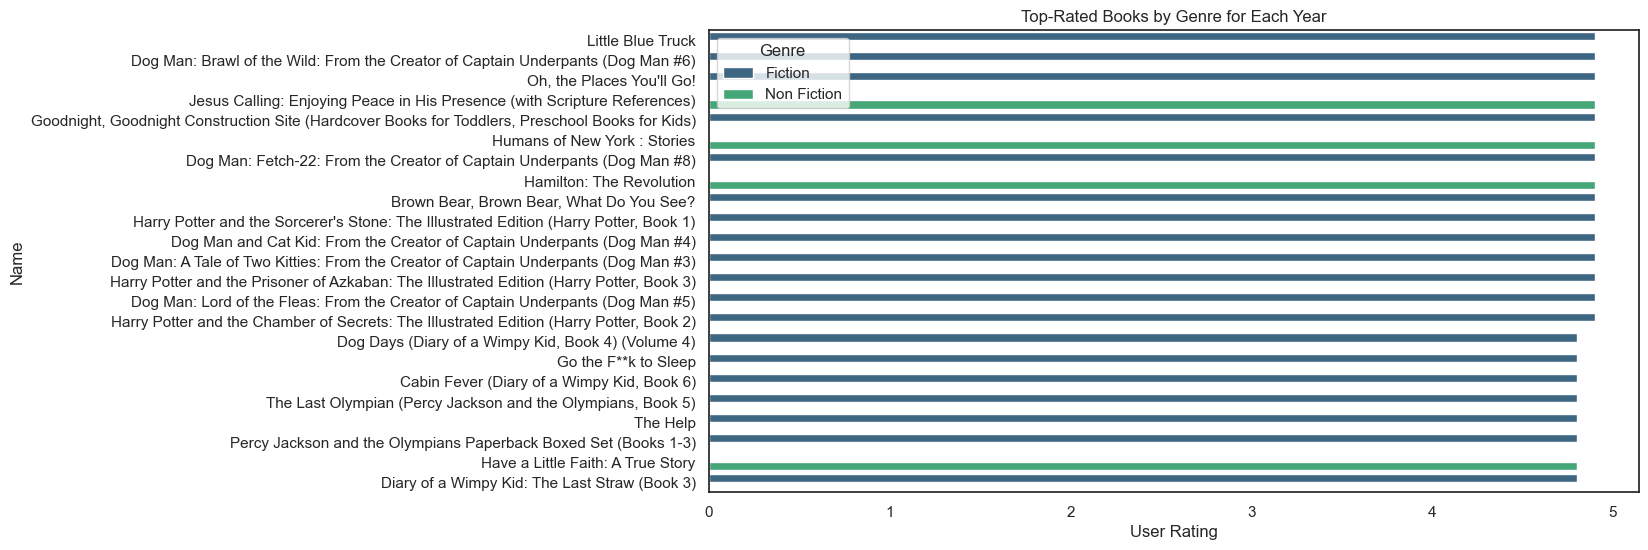

In [563]:
# Sort the DataFrame by UserRating
amz_top5year_ratings = amz_top5year_ratings.sort_values(by='UserRating', ascending=False)

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='UserRating', y='Name', hue='Genre', data=amz_top5year_ratings, palette='viridis')
plt.title('Top-Rated Books by Genre for Each Year')
plt.xlabel('User Rating')
plt.ylabel('Name')
plt.legend(title='Genre')
plt.show()

# Show the bar chart
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
#plt.tight_layout()  # Adjust layout for better visualization



In [373]:
# Analyzing Genre (Amazon) - Top 5 based on Reviews - accross years
amz_top5year_reviews = df_amazon.groupby(df_amazon['Year']).apply(lambda x: x.nlargest(5, 'Reviews')).reset_index(drop=True)
amz_top5year_reviews.head(10)


,Name,Author,UserRating,Reviews,Price,Year,Genre
0,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.6,19720,8,2009,Fiction
1,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction
2,"Twilight (The Twilight Saga, Book 1)",Stephenie Meyer,4.7,11676,9,2009,Fiction
3,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2009,Fiction
4,Outliers: The Story of Success,Malcolm Gladwell,4.6,10426,20,2009,Non Fiction
5,The Hunger Games,Suzanne Collins,4.7,32122,14,2010,Fiction
6,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction
7,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2010,Fiction
8,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
9,The Help,Kathryn Stockett,4.8,13871,6,2010,Fiction


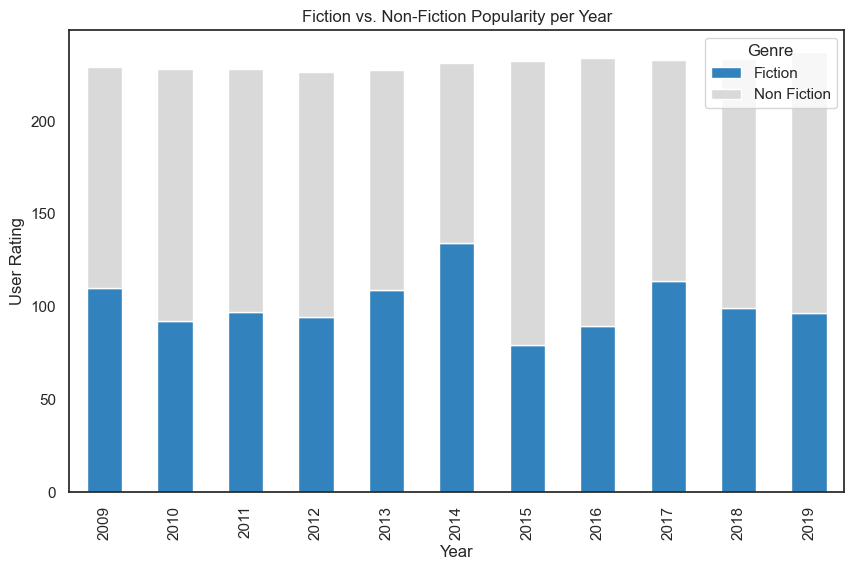

In [546]:
#Graph the Fiction vs. Non-Fiction numbers for each year according to user rating sum
pivot_df = df_amazon.pivot_table(index='Year', columns='Genre', values='UserRating', aggfunc='sum')
#pivot_df

pivot_df.plot(kind='bar', stacked=True, cmap='tab20c', figsize=(10, 6))


# Set labels and title
plt.xlabel('Year')
plt.ylabel('User Rating')
plt.title('Fiction vs. Non-Fiction Popularity per Year')

# Show the plot
plt.legend(title='Genre')
plt.show()

#### What books make the rankings over several years?

/Users/darpino/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


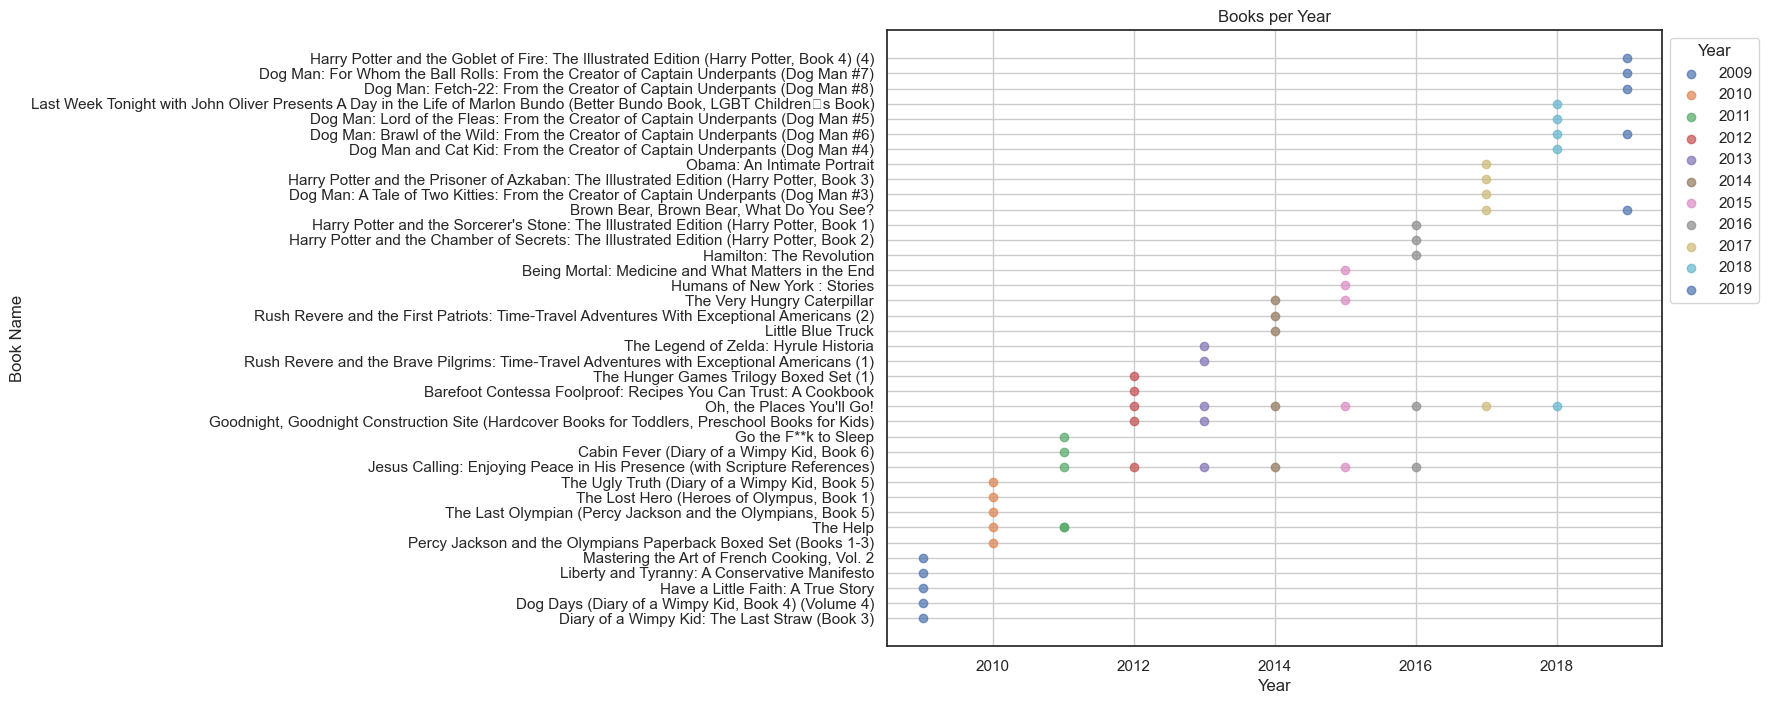

In [529]:
#Graph the Fiction vs. Non-Fiction numbers for each year according to user rating
#CHATGPT is amazing!!! How did I not figure out how to use it earlier?

# Group books by year
grouped_books = amz_top5year_ratings.groupby('Year')['Name'].apply(list)
grouped_books

# Plotting the scatter plot
plt.figure(figsize=(10, 8))
for year, books in grouped_books.items():
    plt.scatter([year] * len(books), books, label=str(year), alpha=0.7)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Book Name')
plt.title('Books per Year')

# Show the plot
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

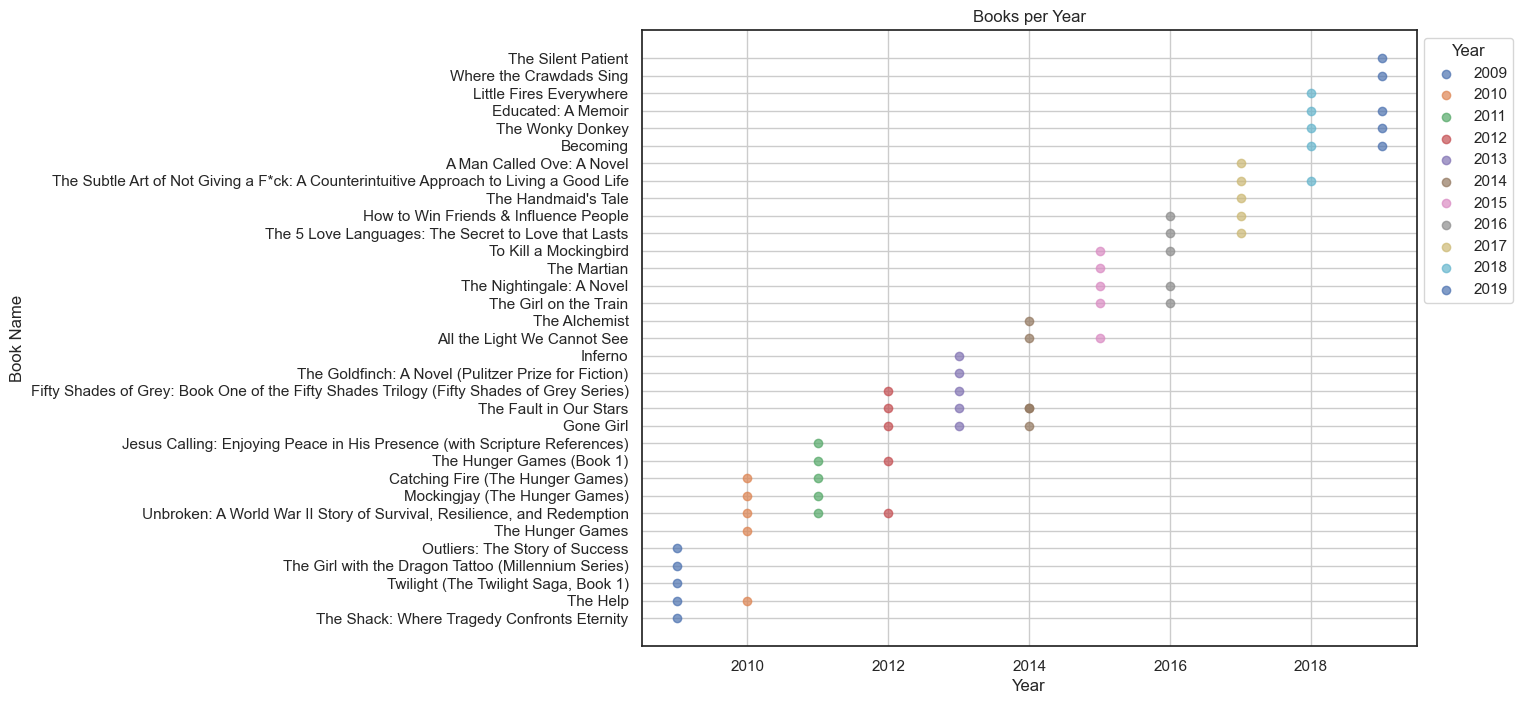

In [564]:
#Graph the Fiction vs. Non-Fiction numbers for each year according to user reviews
#CHATGPT is amazing!!! How did I not figure out how to use it earlier?

# Group books by year
grouped_books = amz_top5year_reviews.groupby('Year')['Name'].apply(list)
grouped_books

# Plotting the scatter plot
plt.figure(figsize=(10, 8))
for year, books in grouped_books.items():
    plt.scatter([year] * len(books), books, label=str(year), alpha=0.7)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Book Name')
plt.title('Books per Year')

# Show the plot
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#### Does cost of book influence their popularity?
For this question we look at only the Amazon data set. The goodreads data set does not include cost.

We learn that there are 'popular' books on the list that are in the top of expensive items. It appears that these books are more for necessity than for enjoyment (textbooks, exam prep, etc.). This leads to the question of books that are most popular and their cost based on user ratings as opposed to just sales.

In [83]:
# List top 10 most expensive book titles. From the results here it seems we have to explore whether the books
   # making top lists are based on popularity, or based on need. Four of these top 10 books are study guides
   # or textbooks.

df_amazon.groupby("Name")["Price"].mean().sort_values(ascending=False).head(10)

Name
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5            105.0
The Twilight Saga Collection                                                          82.0
Hamilton: The Revolution                                                              54.0
The Book of Basketball: The NBA According to The Sports Guy                           53.0
Harry Potter Paperback Box Set (Books 1-7)                                            52.0
Publication Manual of the American Psychological Association, 6th Edition             46.0
Watchmen                                                                              42.0
The Official SAT Study Guide                                                          40.0
The Alchemist                                                                         39.0
The Official SAT Study Guide, 2016 Edition (Official Study Guide for the New Sat)     36.0
Name: Price, dtype: float64

/Users/darpino/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


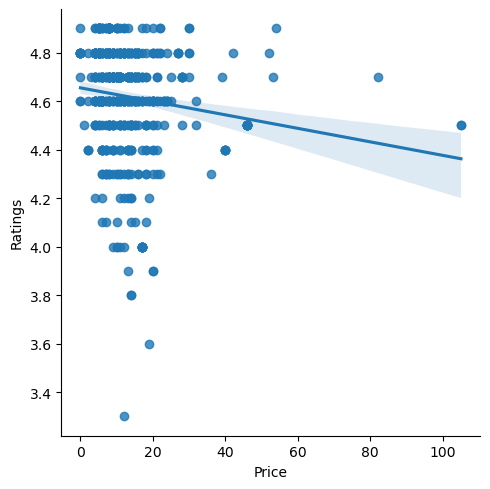

In [84]:
# Here we use a seaborn plot to map the UserRatings against the book Price (courtersy of ChatGPT)
# We can see that most of the books that have highest user ratings fall in the lower price range, 
  # however, the expensive 'need' books are still receiving reasonably high reviews, so people are not 
  # totally disatisfied with them
sns.lmplot(y='UserRating',x='Price',data=df_amazon)
plt.ylabel('Ratings')
plt.xlabel('Price');

In [232]:
#Show titles with highest occurrence counts accross all years
amz_name_counts = df_amazon.groupby('Genre').apply(lambda x: x['Name'].value_counts().head(5))

amz_name_counts

Genre        Name                                                                             
Fiction      Oh, the Places You'll Go!                                                             8
             The Very Hungry Caterpillar                                                           7
             Giraffes Can't Dance                                                                  5
             Wonder                                                                                5
             To Kill a Mockingbird                                                                 5
Non Fiction  Publication Manual of the American Psychological Association, 6th Edition            10
             StrengthsFinder 2.0                                                                   9
             The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
             Jesus Calling: Enjoying Peace in His Presence (with Scripture References)           

#### Authors with the highest counts of books in top 50 over the years 

In [282]:
#df_amazon.Author.value_counts()

amz_popular_authors = df_amazon.groupby('Author')['Author'].agg(['count']).sort_values(by='count',ascending=False).head(10)
amz_popular_authors.reset_index(inplace=True)

amz_popular_authors

,Author,count
0,Jeff Kinney,12
1,Gary Chapman,11
2,Suzanne Collins,11
3,Rick Riordan,11
4,American Psychological Association,10
5,Gallup,9
6,Dr. Seuss,9
7,Rob Elliott,8
8,Eric Carle,7
9,Bill O'Reilly,7


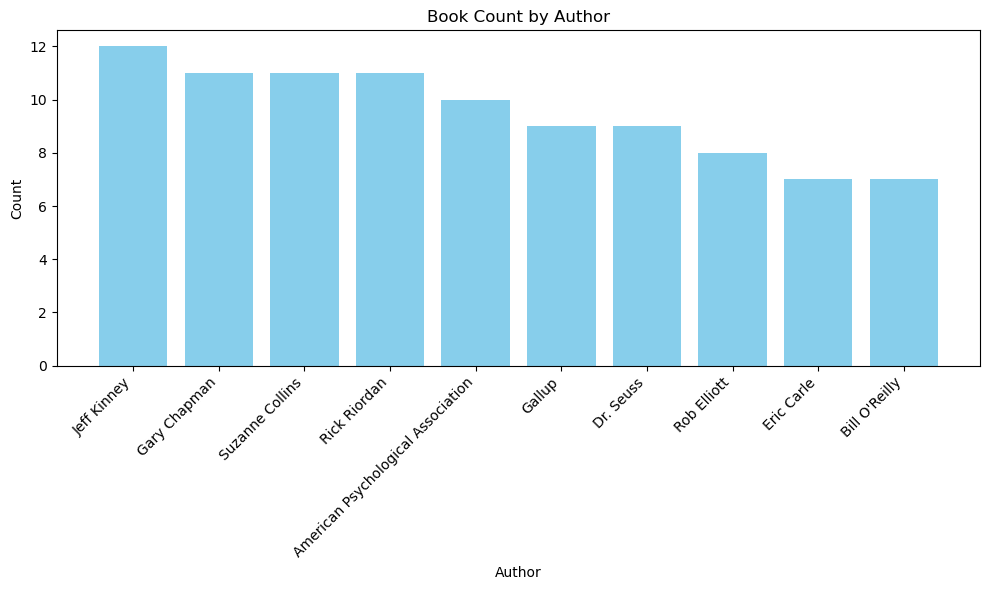

In [287]:
#amz_popular_authors 

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(amz_popular_authors['Author'], amz_popular_authors['count'], color='skyblue')

# Set labels and title
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Book Count by Author')

# Show the bar chart
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [352]:
#Goodreads authors with highest book counts

gr_popular_authors = df_goodreads.groupby('Author')['Author'].agg(['count']).sort_values(by='count',ascending=False).head(20)
gr_popular_authors.reset_index(inplace=True)

gr_popular_authors

,Author,count
0,P.G. Wodehouse,40
1,Stephen King,37
2,Agatha Christie,33
3,Orson Scott Card,32
4,Piers Anthony,29
5,Sandra Brown,28
6,Dick Francis,28
7,Mercedes Lackey,27
8,Rumiko Takahashi,24
9,Margaret Weis/Tracy Hickman,23


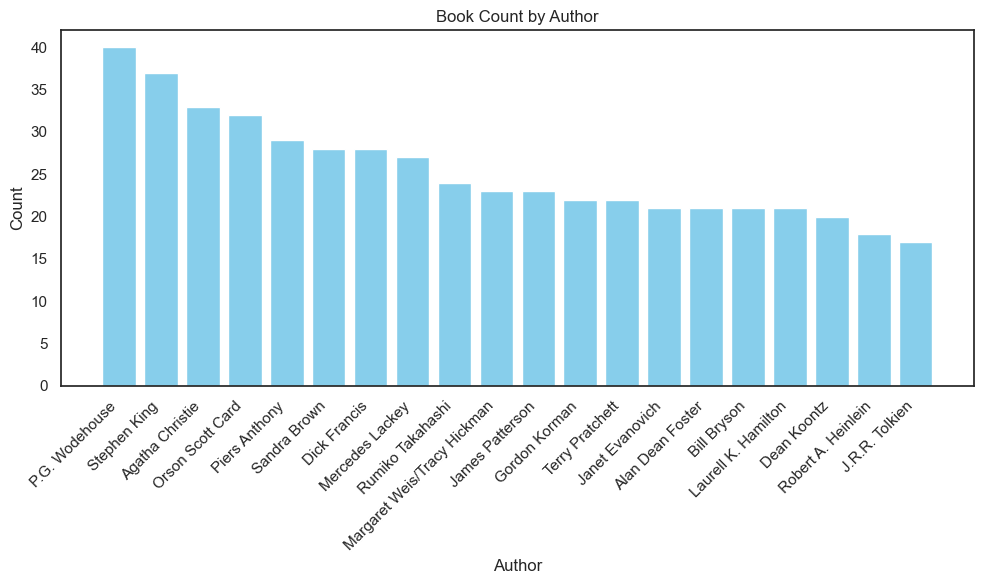

In [353]:

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(gr_popular_authors['Author'], gr_popular_authors['count'], color='skyblue')

# Set labels and title
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Book Count by Author')

# Show the bar chart
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

#### Books with highest ratings and reviews

In [361]:
#Amazon
df_amazon.Name[df_amazon.UserRating==4.9].reset_index(drop=True).head(10)

0             Brown Bear, Brown Bear, What Do You See?
1             Brown Bear, Brown Bear, What Do You See?
2    Dog Man and Cat Kid: From the Creator of Capta...
3    Dog Man: A Tale of Two Kitties: From the Creat...
4    Dog Man: Brawl of the Wild: From the Creator o...
5    Dog Man: Brawl of the Wild: From the Creator o...
6    Dog Man: Fetch-22: From the Creator of Captain...
7    Dog Man: For Whom the Ball Rolls: From the Cre...
8    Dog Man: Lord of the Fleas: From the Creator o...
9    Goodnight, Goodnight Construction Site (Hardco...
Name: Name, dtype: object

In [367]:
#goodreads
df_goodreads[df_goodreads['UserRating'] >= 4.9].sort_values(by='UserRating', ascending=False)[['Name', 'UserRating']].reset_index(drop=True).head(20)

,Name,UserRating
0,Willem de Kooning: Late Paintings,5.0
1,Colossians and Philemon: A Critical and Exeget...,5.0
2,His Princess Devotional: A Royal Encounter Wit...,5.0
3,The American Campaign: U.S. Presidential Campa...,5.0
4,The Irish Anatomist: A Study of Flann O'Brien,5.0
5,Tyrannosaurus Wrecks (Stanley #1),5.0
6,Oliver Wendell Holmes in Paris: Medicine Theo...,5.0
7,Fanning the Flame: Bible Cross and Mission,5.0
8,The New Big Book of America,5.0
9,Taxation of Mineral Rents,5.0


In [369]:
#df_amazon[['Name','Genre','Reviews']].sort_values(by='Reviews',ascending=False).head(10)

amz_top5year_reviews1 = df_amazon[['Name','Genre','Year','Reviews']].groupby(df_amazon['Year']).apply(lambda x: x.nlargest(5, 'Reviews')).reset_index(drop=True)
amz_top5year_reviews1.head(20)

,Name,Genre,Year,Reviews
0,The Shack: Where Tragedy Confronts Eternity,Fiction,2009,19720
1,The Help,Fiction,2009,13871
2,"Twilight (The Twilight Saga, Book 1)",Fiction,2009,11676
3,The Girl with the Dragon Tattoo (Millennium Se...,Fiction,2009,10559
4,Outliers: The Story of Success,Non Fiction,2009,10426
5,The Hunger Games,Fiction,2010,32122
6,"Unbroken: A World War II Story of Survival, Re...",Non Fiction,2010,29673
7,Mockingjay (The Hunger Games),Fiction,2010,26741
8,Catching Fire (The Hunger Games),Fiction,2010,22614
9,The Help,Fiction,2010,13871


In [378]:
#goodreads
gr_top_reviews = df_goodreads[['Name','Year','UserRating', 'RatingsCount', 'Reviews']].groupby(df_goodreads['Year']).apply(lambda x: x.nlargest(5, 'RatingsCount')).reset_index(drop=True)
gr_top_reviews.head(20)


,Name,Year,UserRating,RatingsCount,Reviews
0,Moonraker's Bride,1973,4.31,2281,302
1,The Pound Era,1973,4.37,614,29
2,Battle for the Planet of the Apes,1973,3.66,461,10
3,The Princess Bride: S. Morgenstern's Classic T...,1973,4.26,460,73
4,Li Po and Tu Fu: Poems,1973,4.14,389,28
5,Turtle Island,1974,4.09,3809,105
6,Saint Thomas Aquinas,1974,4.14,2987,175
7,Virginia Woolf: A Biography,1974,4.17,2583,66
8,The Only Dance There Is,1974,4.24,713,30
9,Stone Age Economics,1974,3.90,281,26


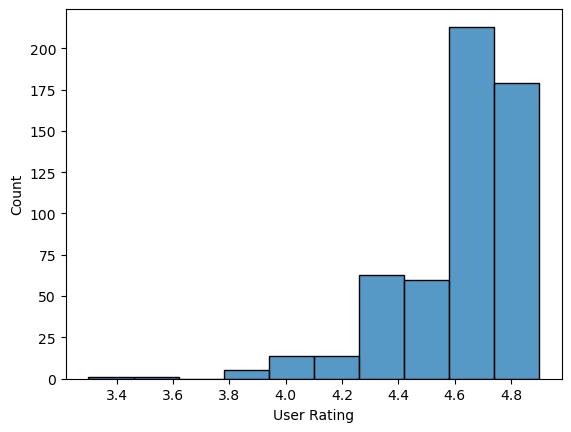

In [79]:
#Distribution of ratings Amazon
sns.histplot(data=df_amazon.UserRating,bins=10)
plt.xlabel("User Rating");

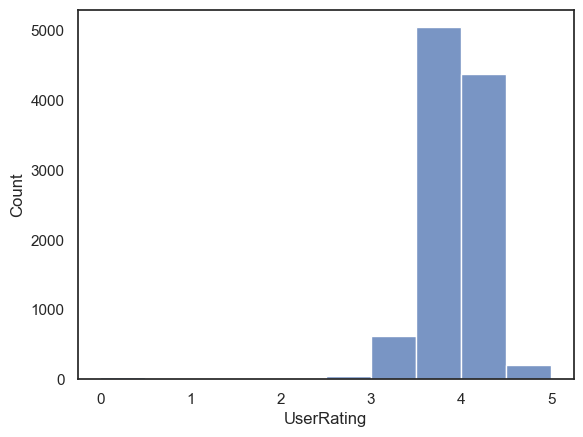

In [381]:
#Distribution of ratings Goodreads - since this is not top50, but all books, the distribution is broader
sns.histplot(data=df_goodreads.UserRating,bins=10)
plt.xlabel("UserRating");

/var/folders/jn/b7xrp7ts1n3fmnzk1xldvd4r0000gn/T/ipykernel_8519/67378314.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='UserRating', y='Reviews', data=df_amazon, palette='viridis', s=100, alpha=0.7)


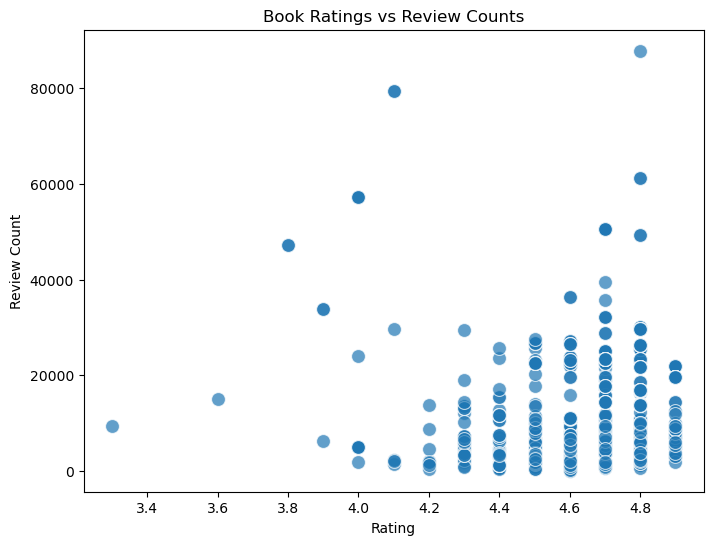

In [288]:

#Amazon

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UserRating', y='Reviews', data=df_amazon, palette='viridis', s=100, alpha=0.7)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Book Ratings vs Review Counts')

# Show the plot
plt.show()

/var/folders/jn/b7xrp7ts1n3fmnzk1xldvd4r0000gn/T/ipykernel_8519/1027716871.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='UserRating', y='Reviews', data=df_goodreads, palette='viridis', s=100, alpha=0.7)


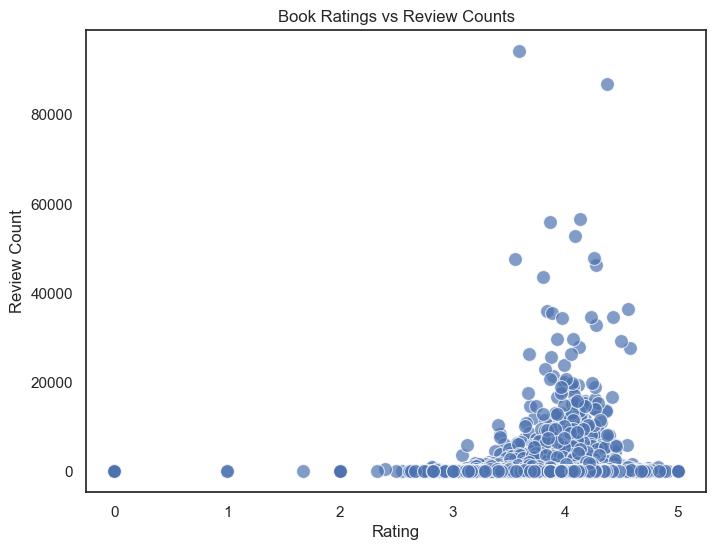

In [382]:

#Goodreads

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UserRating', y='Reviews', data=df_goodreads, palette='viridis', s=100, alpha=0.7)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Book Ratings vs Review Counts')

# Show the plot
plt.show()

/var/folders/jn/b7xrp7ts1n3fmnzk1xldvd4r0000gn/T/ipykernel_8519/1799085977.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='UserRating', y='RatingsCount', data=df_goodreads, palette='viridis', s=100, alpha=0.7)


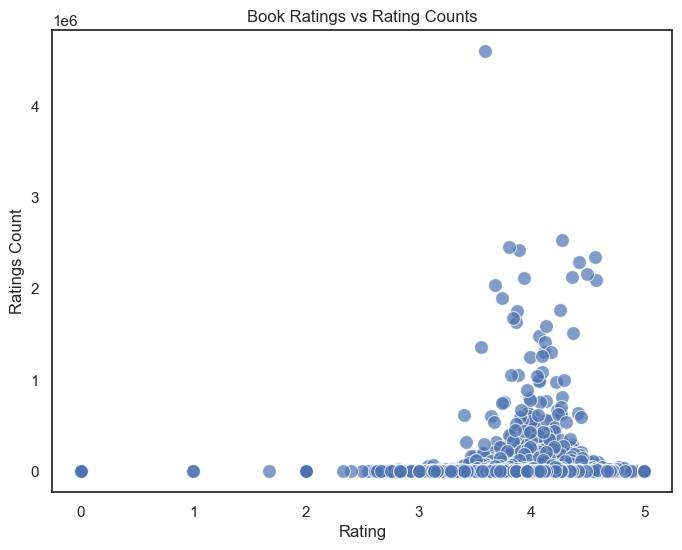

In [383]:

#Goodreads - but UserRating vs. RatingsCount

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UserRating', y='RatingsCount', data=df_goodreads, palette='viridis', s=100, alpha=0.7)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Ratings Count')
plt.title('Book Ratings vs Rating Counts')

# Show the plot
plt.show()

In [308]:
# Amazon - taking a look at what those top 25 reviewed books are
amz_topReviewCounts = df_amazon[df_amazon['Reviews'] > 6000][['Name', 'Reviews','UserRating']].sort_values(by='Reviews',ascending=False).drop_duplicates().reset_index(drop=True).head(25)
amz_topReviewCounts

,Name,Reviews,UserRating
0,Where the Crawdads Sing,87841,4.8
1,The Girl on the Train,79446,4.1
2,Becoming,61133,4.8
3,Gone Girl,57271,4.0
4,The Fault in Our Stars,50482,4.7
5,The Nightingale: A Novel,49288,4.8
6,Fifty Shades of Grey: Book One of the Fifty Sh...,47265,3.8
7,The Martian,39459,4.7
8,All the Light We Cannot See,36348,4.6
9,The Alchemist,35799,4.7


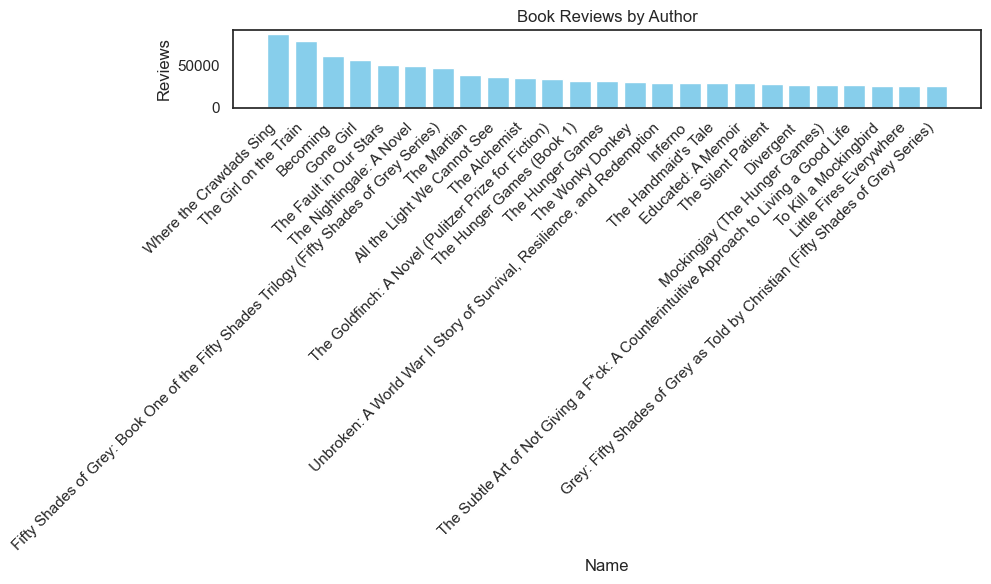

In [307]:
#amazon

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(amz_topReviewCounts['Name'], amz_topReviewCounts['Reviews'], color='skyblue')

# Set labels and title
plt.xlabel('Name')
plt.ylabel('Reviews')
plt.title('Book Reviews by Author')

# Show the bar chart
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [391]:
# Goodreads - taking a look at what those top most rated books are
gr_topReviewCounts = df_goodreads[df_goodreads['RatingsCount'] > 2000000][['Name', 'Reviews','UserRating','RatingsCount']].sort_values(by='Reviews',ascending=False).drop_duplicates().reset_index(drop=True).head(25)
gr_topReviewCounts

,Name,Reviews,UserRating,RatingsCount
0,Twilight (Twilight #1),94265,3.59,4597666
1,The Catcher in the Rye,43499,3.80,2457092
2,Harry Potter and the Prisoner of Azkaban (Harr...,36325,4.56,2339585
3,Harry Potter and the Chamber of Secrets (Harry...,34692,4.42,2293963
4,The Hobbit or There and Back Again,32871,4.27,2530894
5,Animal Farm,29677,3.93,2111750
6,Harry Potter and the Order of the Phoenix (Har...,29221,4.49,2153167
7,Harry Potter and the Half-Blood Prince (Harry ...,27591,4.57,2095690
8,Lord of the Flies,26199,3.68,2036679
9,Angels & Demons (Robert Langdon #1),21303,3.89,2418736


In [401]:
# Goodreads - taking a look at what those top most reviewed books are
gr_topReviewCounts = df_goodreads[df_goodreads['Reviews'] > 35000][['Name', 'Reviews','UserRating','RatingsCount']].sort_values(by='Reviews',ascending=False).drop_duplicates().reset_index(drop=True).head(10)
gr_topReviewCounts

,Name,Reviews,UserRating,RatingsCount
0,Twilight (Twilight #1),94265,3.59,4597666
1,The Book Thief,86881,4.37,1516367
2,The Giver (The Giver #1),56604,4.13,1585589
3,The Alchemist,55843,3.86,1631221
4,Water for Elephants,52759,4.09,1260027
5,The Lightning Thief (Percy Jackson and the Oly...,47951,4.25,1766725
6,Eat Pray Love,47620,3.55,1362264
7,The Glass Castle,46176,4.27,808656
8,The Catcher in the Rye,43499,3.80,2457092
9,Harry Potter and the Prisoner of Azkaban (Harr...,36325,4.56,2339585


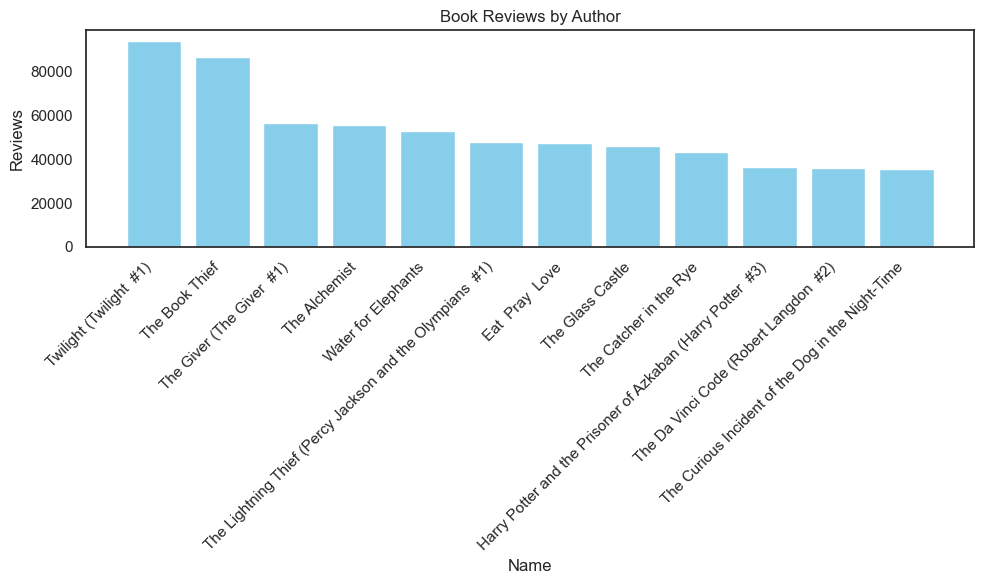

In [433]:
#Goodreads

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(gr_topReviewCounts['Name'], gr_topReviewCounts['Reviews'], color='skyblue')

# Set labels and title
plt.xlabel('Name')
plt.ylabel('Reviews')
plt.title('Book Reviews by Author')

# Show the bar chart
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


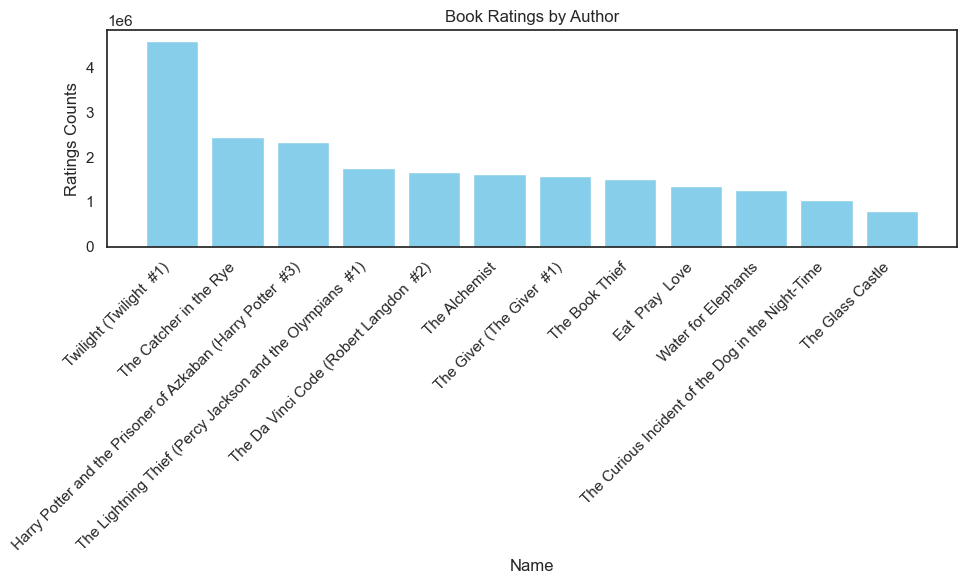

In [518]:
#goodreads
gr_topRatingCounts = gr_topReviewCounts.sort_values(by='RatingsCount', ascending=False).reset_index(drop=True).head(25)
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(gr_topRatingCounts['Name'], gr_topRatingCounts['RatingsCount'], color='skyblue')

# Set labels and title
plt.xlabel('Name')
plt.ylabel('Ratings Counts')
plt.title('Book Ratings by Author')

# Show the bar chart
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


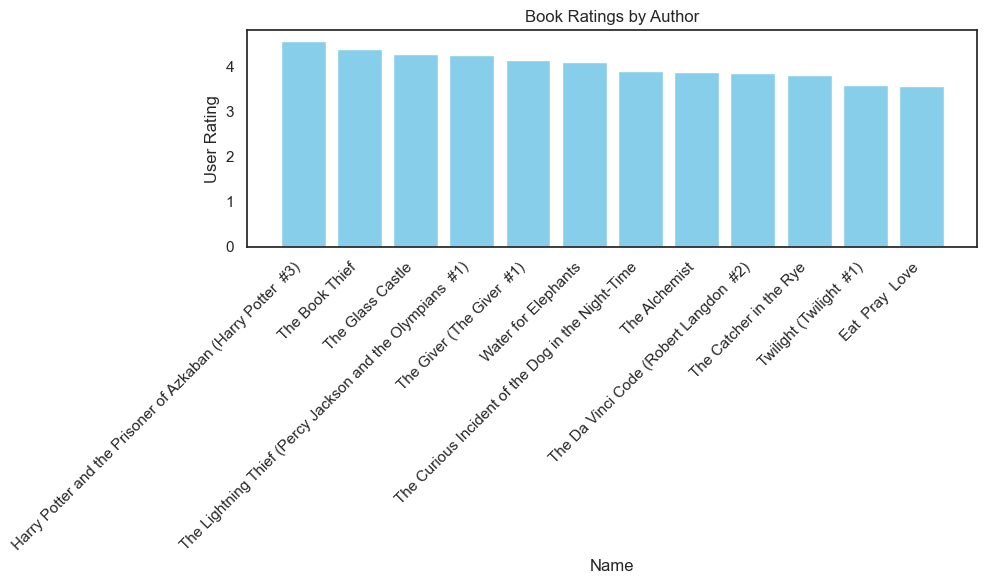

In [516]:
#goodreads
gr_topRatings = gr_topReviewCounts.sort_values(by='UserRating', ascending=False).reset_index(drop=True).head(25)
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(gr_topRatings['Name'], gr_topRatings['UserRating'], color='skyblue')

# Set labels and title
plt.xlabel('Name')
plt.ylabel('User Rating')
plt.title('Book Ratings by Author')

# Show the bar chart
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [432]:
# Display the top ten books by rating counts and review counts d
gr_reviews_rating = pd.concat([gr_topRatingCounts['Name'], gr_topReviewCounts['Name']], axis=1)
gr_reviews_rating

,Name,Name
0,Twilight (Twilight #1),Twilight (Twilight #1)
1,The Catcher in the Rye,The Book Thief
2,Harry Potter and the Prisoner of Azkaban (Harr...,The Giver (The Giver #1)
3,The Lightning Thief (Percy Jackson and the Oly...,The Alchemist
4,The Da Vinci Code (Robert Langdon #2),Water for Elephants
5,The Alchemist,The Lightning Thief (Percy Jackson and the Oly...
6,The Giver (The Giver #1),Eat Pray Love
7,The Book Thief,The Glass Castle
8,Eat Pray Love,The Catcher in the Rye
9,Water for Elephants,Harry Potter and the Prisoner of Azkaban (Harr...


In [474]:
#goodreads books with a rating = 4.3 and highest counts of User Rating counts (sort by UserRating)

df_test = df_goodreads[
    (df_goodreads['RatingsCount'] > 250000) & (df_goodreads['UserRating'] >= 4.3)
][['Name', 'Reviews', 'UserRating', 'RatingsCount']].sort_values(
    by='UserRating', ascending=False
).drop_duplicates().reset_index(drop=True).head(25)

df_test
#gr_topRatingsCounts = df_goodreads[df_goodreads['RatingsCount'] > 2000000][['Name', 'Reviews','UserRating','RatingsCount']].sort_values(by='RatingsCount',ascending=False).drop_duplicates().reset_index(drop=True).head(25)
#gr_topRatingsCounts




,Name,Reviews,UserRating,RatingsCount
0,Harry Potter and the Half-Blood Prince (Harry ...,27591,4.57,2095690
1,Harry Potter and the Prisoner of Azkaban (Harr...,36325,4.56,2339585
2,Harry Potter and the Order of the Phoenix (Har...,29221,4.49,2153167
3,The Two Towers (The Lord of the Rings #2),5798,4.44,593467
4,Harry Potter and the Chamber of Secrets (Harry...,34692,4.42,2293963
5,A Clash of Kings (A Song of Ice and Fire #2),16535,4.41,638766
6,The Book Thief,86881,4.37,1516367
7,The Fellowship of the Ring (The Lord of the Ri...,13670,4.36,2128944
8,Man's Search for Meaning,13449,4.36,282127
9,The Lorax,3532,4.35,260054


In [473]:
#goodreads books with a rating >=4.3 and highest counts of Reviews  (sort by UserRating)
df_test2 = df_goodreads[
    (df_goodreads['Reviews'] > 10000) & (df_goodreads['UserRating'] >= 4.3)
     ][['Name', 'Reviews','UserRating','RatingsCount']].sort_values(
        by='UserRating',ascending=False
     ).drop_duplicates().reset_index(drop=True).head(25)
df_test2

#gr_topReviewCounts = df_goodreads[df_goodreads['Reviews'] > 35000][['Name', 'Reviews','UserRating','RatingsCount']].sort_values(by='Reviews',ascending=False).drop_duplicates().reset_index(drop=True).head(25)
#gr_topReviewCounts

,Name,Reviews,UserRating,RatingsCount
0,Harry Potter and the Half-Blood Prince (Harry ...,27591,4.57,2095690
1,Harry Potter and the Prisoner of Azkaban (Harr...,36325,4.56,2339585
2,Harry Potter and the Order of the Phoenix (Har...,29221,4.49,2153167
3,Harry Potter and the Chamber of Secrets (Harry...,34692,4.42,2293963
4,A Clash of Kings (A Song of Ice and Fire #2),16535,4.41,638766
5,The Book Thief,86881,4.37,1516367
6,The Fellowship of the Ring (The Lord of the Ri...,13670,4.36,2128944
7,Man's Search for Meaning,13449,4.36,282127
8,Dragonfly in Amber (Outlander #2),11121,4.32,222140
9,Matilda,11576,4.31,541914


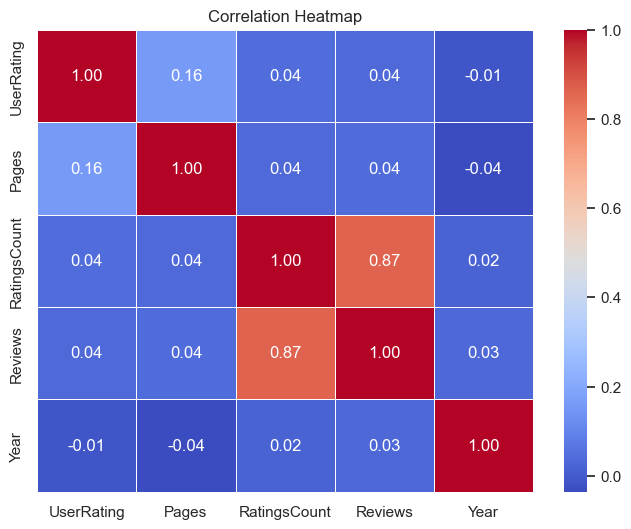

In [565]:
# Compute the correlation matrix (number of page influence on ratings?)
dropCol_corr = ['Name','Author']
df_goodreads_corr = df_goodreads.drop(columns=dropCol_corr)
df_goodreads_corr
corr_matrix = df_goodreads_corr.corr()

# Create a seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


/Users/darpino/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


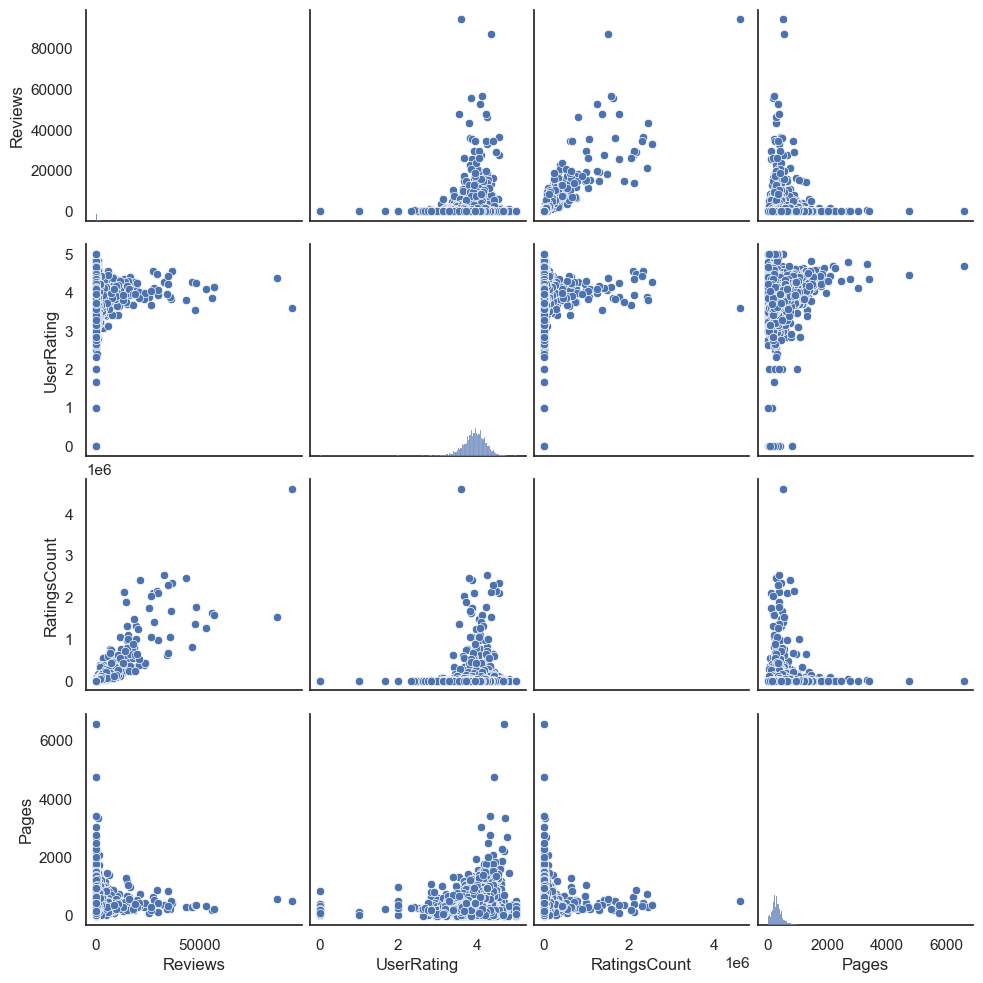

In [512]:
# Create a pair plot
sns.pairplot(df_goodreads[['Reviews', 'UserRating', 'RatingsCount', 'Pages']])
plt.show()


TypeError: 'Figure' object is not callable

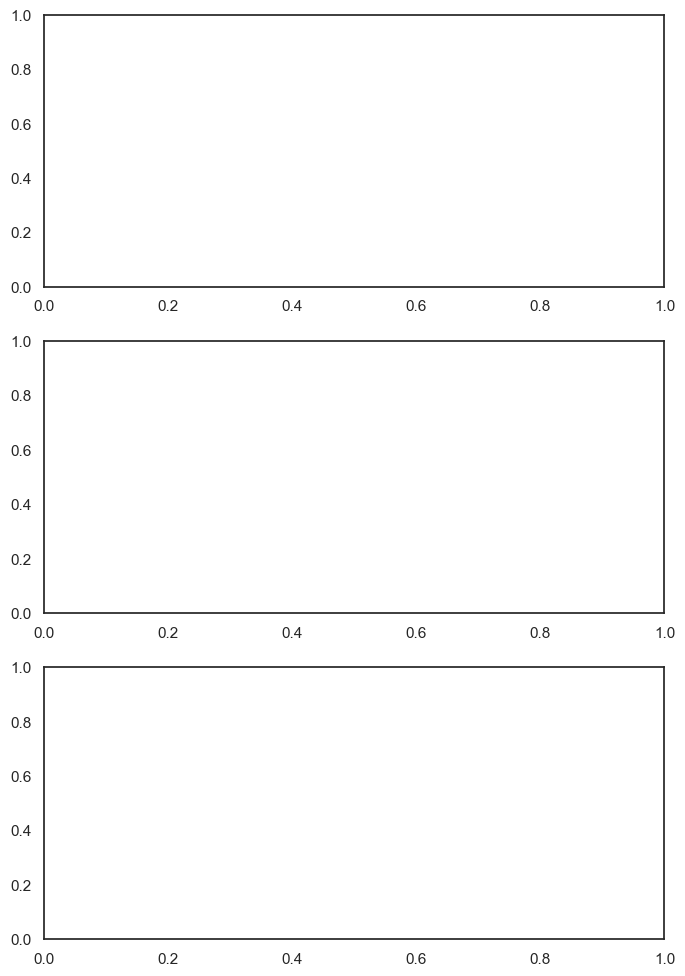

In [524]:
#Goodreads
# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(2 * x)

# Create a figure and three subplots (3 rows, 1 column)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

### Plot the first graph on the first subplot
ax1.plot(x, y1, label='sin(x)', color='blue')
ax1.set_title('Graph 1')
ax1.legend()

# Create a bar chart
ax1.plt.figure(figsize=(10, 10))
ax1.plt.bar(gr_topReviewCounts['Name'], gr_topReviewCounts['Reviews'], color='skyblue')
# Set labels and title
ax1.plt.xlabel('Name')
plt.ylabel('Reviews')
plt.title('Book Reviews by Author')
# Show the bar chart
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
#plt.tight_layout()  # Adjust layout for better visualization
#plt.show()


### Plot the second graph on the second subplot
gr_topRatingCounts = gr_topReviewCounts.sort_values(by='RatingsCount', ascending=False).reset_index(drop=True).head(25)
# Create a bar chart
#plt.figure(figsize=(10, 6))
plt.bar(gr_topRatingCounts['Name'], gr_topRatingCounts['RatingsCount'], color='skyblue')
# Set labels and title
plt.xlabel('Name')
plt.ylabel('Ratings Counts')
plt.title('Book Ratings by Author')
# Show the bar chart
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
#plt.tight_layout()  # Adjust layout for better visualization
#plt.show()

# Plot the third graph on the third subplot
gr_topRatings = gr_topReviewCounts.sort_values(by='UserRating', ascending=False).reset_index(drop=True).head(25)
# Create a bar chart
#plt.figure(figsize=(10, 6))
plt.bar(gr_topRatings['Name'], gr_topRatings['UserRating'], color='skyblue')
# Set labels and title
plt.xlabel('Name')
plt.ylabel('User Rating')
# Show the bar chart
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
#plt.tight_layout()  # Adjust layout for better visualization
#plt.show()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()